# Machine Learning

**Objective**: Predicting property sold price from HouseSigma


In [1]:
import pandas as pd
import numpy as np
import datetime

In [218]:
df = pd.read_csv('2020_HouseSigma_listing_details_JUST_SOLD_final.csv')

In [220]:
df.columns

Index(['Listing_num', 'Address', 'Community', 'House_type', 'Listing_price',
       'Sigma_estimate', 'Estimated_on', 'Sold_price', 'Bedroom', 'Washroom',
       'Parking', 'Tax', 'Property_type', 'Maintenance', 'Building_age',
       'Size', 'Basement', 'Utility_incl', 'Days_on_market', 'Rental_dom',
       'Listed_on', 'Updated_on', 'Rental_estimate', 'Rental_yield',
       'Major_intersection', 'Amenities', 'Exposure', 'Municipality',
       'Description'],
      dtype='object')

In [ ]:
#df.shape[0]

In [ ]:
# # Show all columns
# pd.set_option('display.max_columns', None)
# df.head(30)

In [219]:
# Removing special characters & words
df['Days_on_market'] = df['Days_on_market'].replace(' days', '', regex=True)
df['Size'] = df['Size'].str.replace(' (SigmaEstimate®)', '', regex=False).replace(' feet²', '', regex=True)
df['Maintenance'] = df['Maintenance'].replace('/month', '', regex = True).replace('[\$,)]', '', regex = True)
df['Tax'] = df['Tax'].replace('[\$,)]', '', regex = True)
df['Rental_dom'] = df['Rental_dom'].str.replace(' day(s)', '', regex=False)
df['Rental_yield'] =df['Rental_yield'].replace('%', '', regex = True)
df[['Listing_price', 'Sigma_estimate', 'Sold_price', 'Rental_estimate']] = \
df[['Listing_price', 'Sigma_estimate', 'Sold_price', 'Rental_estimate']].replace('[\$,)]', '', regex = True)


# Removing some words
df['Bedroom'] = df['Bedroom'].str.replace(' Bedrooms', '', regex=False)
df['Washroom'] = df['Washroom'].str.replace(' Bathrooms', '', regex=False)
df['Parking'] = df['Parking'] = df['Parking'].str.replace(' Garage', '', regex=False)

# To capitalize all letters in the series
df['Exposure'] = df['Exposure'].str.upper()

# set a cell to NaN in a pandas dataframe
df[['Estimated_on', 'Building_age']] = df[['Estimated_on', 'Building_age']].replace('-', np.NaN)
df['Basement'] = df['Basement'].replace('None', np.NaN)

In [221]:
# coercing into numeric objects
df['Maintenance'] = pd.to_numeric(df['Maintenance'], errors='coerce')
df['Tax'] = pd.to_numeric(df['Tax'], errors='coerce')
df['Days_on_market'] = pd.to_numeric(df['Days_on_market'], errors='coerce')
df['Rental_dom'] = pd.to_numeric(df['Rental_dom'], errors='coerce')
df['Listing_price'] = pd.to_numeric(df['Listing_price'], errors='coerce')
df['Sigma_estimate'] = pd.to_numeric(df['Sigma_estimate'], errors='coerce')
df['Sold_price'] = pd.to_numeric(df['Sold_price'], errors='coerce')
df['Rental_estimate'] = pd.to_numeric(df['Rental_estimate'], errors='coerce')
df['Rental_yield'] = pd.to_numeric(df['Rental_yield'], errors='coerce')


# Identifying incorrect size categories
index_581 = df[df['Size'] == '581'].index
index_900 = df[df['Size'] == '900'].index
index_1300 = df[df['Size'] == '1300'].index
index_br_0 = df[df['Bedroom'] == '0+1'].index

# Changing 900 into 900-999
df.loc[index_581, 'Size'] = '500-599'
df.loc[index_900, 'Size'] = '900-999'
df.loc[index_1300, 'Size'] = '1200-1399'
df.loc[index_br_0, 'Bedroom'] = '0'

# To change string dates into datetime objects
# [Listed_on, Estimated_on, Updated_on]

df['Estimated_on'] = pd.to_datetime(df['Estimated_on'], format = '%Y-%m-%d')
df['Listed_on'] = pd.to_datetime(df['Listed_on'], format = '%Y-%m-%d')
df['Updated_on'] = pd.to_datetime(df['Updated_on'], format = '%Y-%m-%d')

# Changing intersection symbols
df['Major_intersection'] = df['Major_intersection']\
.replace('/', '&', regex = True)\
.replace('And', '&', regex = True)\
.replace(' & ', '&', regex = True)\
.replace('&', ' & ', regex = True)

In [ ]:
df.groupby('Parking')['Major_intersection'].count()

In [ ]:
# # Renaming columns with units
# df.rename(columns={'Listing_price': 'Listing_price ($)',\
#                    'Sigma_estimate': 'Sigma_estimate ($)',\
#                    'Sold_price': 'Sold_price ($)',\
#                    'Tax': 'Tax ($)',\
#                    'Maintenance': 'Maintenance ($/month)',\
#                    'Size': 'Size (feet²)',\
#                    'Rental_dom':'Rental_days_on_market',\
#                    'Rental_estimate': 'Rental_estimate ($)',\
#                    'Rental_yield':'Rental_yield (%)'
#                   })

In [222]:
df.to_csv('HouseSigma_ml_dataset.csv', index = False)

# Machine Learning

List of variables
- Listing_num:
- Address: 
- Community: 
- House_type: 
- Listing_price:
- Sigma_estimate: 
- Estimated_on: 
- Sold_price: 
- Bedroom: 
- Washroom:
- Parking: 
- Tax: 
- Property_type: 
- Maintenance: 
- Building_age:
- Size: 
- Basement: 
- Utility_incl: 
- Date_on_market: 
- Rental_dom:
- Listed_on: 
- Updated_on: 
- Rental_estimate: 
- Rental_yield:
- Major_intersection: 
- Amenities: 
- Exposure: 
- Municipality:
- Description- 

In [272]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
# pd.plotting.scatter_matrix(df, figsize=(20,20)) #diagonal plots show data distribution

### Working dataframe for regression modeling

In [235]:
#import dataframe
df = pd.read_csv('HouseSigma_ml_dataset.csv')
df.shape

(305, 29)

In [236]:
# Return columns that have numerical value
df = df.select_dtypes(include = ['float64'])

# df[['Listing_price', 'Sigma_estimate', 'Sold_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_yield']]

In [237]:
# Remove rows with NaN values; otherwise machine learning doesn't work?
df = df.dropna()
df.shape

(255, 8)

In [238]:
# df.to_csv('HouseSigma_ml_dataset_regression.csv', index = False)

## Linear Regression
### Train a model
Let's now train a model

For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns. With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.

In [240]:
# Import dataframe--only numerical values, no NaN
df = pd.read_csv('HouseSigma_ml_dataset_regression.csv')

In [261]:
from sklearn.model_selection import train_test_split
# provide a dataframe of all numerical variables you want to include for X
# provide a series of target variable
# 'Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_yield'


X = df[['Tax']]
y = df['Sold_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2020)

In [262]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(255, 1)
(178, 1)
(77, 1)


In [263]:
# Import linear repression from scikitlearn
from sklearn.linear_model import LinearRegression

#instantiate it
lr = LinearRegression()

In [264]:
# now train the model
lr.fit(X_train, y_train)

LinearRegression()

In [265]:
lr.coef_ # theta1, slope

array([90.41454039])

In [266]:
lr.intercept_ #theta0, bias

420692.87340322323

### Make predictions
Now making predictions and evaluate the performance of the model on the test set

In [267]:
y_pred = lr.predict(X_test)

In [268]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(mse_test)
print(r2_test)

2258697977.5991015
0.4181762003752293


In [258]:
X_test.values

array([[2342.],
       [2725.],
       [2565.],
       [1739.],
       [2465.],
       [2369.],
       [1853.],
       [2759.],
       [2866.],
       [2237.],
       [1949.],
       [3058.],
       [2195.],
       [1962.],
       [2230.],
       [2351.],
       [1949.],
       [2379.],
       [2363.],
       [2177.],
       [2315.],
       [2111.],
       [1973.],
       [2717.],
       [2093.],
       [2393.],
       [2567.],
       [2524.],
       [2806.],
       [2141.],
       [2243.],
       [2117.],
       [2555.],
       [2249.],
       [2231.],
       [2243.],
       [2231.],
       [1889.],
       [2501.],
       [2417.],
       [2327.],
       [2765.],
       [3449.],
       [2021.],
       [2069.],
       [3088.],
       [2600.],
       [2321.],
       [2807.],
       [2543.],
       [2333.],
       [2051.],
       [2183.],
       [2861.],
       [2057.],
       [1907.],
       [2326.],
       [2511.],
       [2855.],
       [2327.],
       [2210.],
       [2699.],
       [

In [259]:
y_test.values

array([550000., 695000., 590000., 555000., 645000., 655000., 560000.,
       715000., 613500., 547000., 544000., 771555., 590000., 572000.,
       650000., 612000., 553000., 601000., 620000., 619000., 662000.,
       565000., 547000., 746000., 610000., 630000., 753425., 582000.,
       700000., 620000., 643000., 608000., 675000., 605000., 625000.,
       575000., 585000., 540000., 580000., 661000., 579900., 741100.,
       699900., 585000., 565000., 780000., 550000., 622000., 675000.,
       692000., 553000., 585000., 560000., 645000., 580000., 590000.,
       580000., 600000., 647500., 635000., 572500., 620000., 760000.,
       673000., 710000., 580000., 715500., 650000., 590300., 659000.,
       619500., 580000., 608000., 780000., 585000., 641000., 572000.])

In [269]:
X_test.values.shape

(77, 1)

In [274]:
y_pred.shape

(77,)

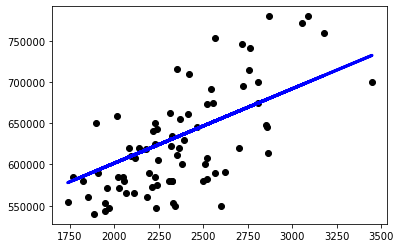

In [276]:
plt.scatter(X_test.values, y_test.values, color='black')
plt.plot(X_test.values, y_pred, color='blue', linewidth=3)

### Create a function that uses Linear Regression

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Listing_price    255 non-null    float64
 1   Sigma_estimate   255 non-null    float64
 2   Sold_price       255 non-null    float64
 3   Tax              255 non-null    float64
 4   Maintenance      255 non-null    float64
 5   Rental_dom       255 non-null    float64
 6   Rental_estimate  255 non-null    float64
 7   Rental_yield     255 non-null    float64
dtypes: float64(8)
memory usage: 16.1 KB


In [332]:
def get_lr_mse_r2(df, list_features):
    X = df[list_features]
    y = df['Sold_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)
    
    #instantiate and fit
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # coefficients & bias
    coeff = lr.coef_
    y_int = lr.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = lr.predict(X_test)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    # add the plot for predicted vs actuals as well as reference line...
    plt.scatter(y_pred, y_test.values, color='black')
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3) # reference line
    
    # Create an empty dict
    dict_lr = dict()
    # Populate dicitonary
    dict_lr['Features'] = list_features
    dict_lr['MSE'] = mse
    dict_lr['R2'] = r2
    dict_lr['Coefficient(s)'] = coeff
    dict_lr['Bias'] = y_int
    
    return dict_lr

Coefficient(s):  [ 6.84145536e-01  3.78058291e+01  1.80024189e+01  1.86847697e+01
 -1.39076055e+03]
Bias:  82361.34972782026
MSE:  1152755716.7263288
R2:  0.703058701164724


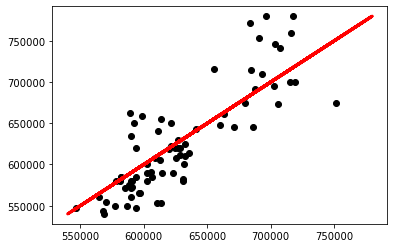

In [370]:
dict_lr = get_lr_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate','Rental_dom'])

Coefficient(s):  [ 6.84145536e-01  3.78058291e+01  1.80024189e+01  1.86847697e+01
 -1.39076055e+03]
Bias:  82361.34972782026
MSE:  1152755716.7263288
R2:  0.703058701164724


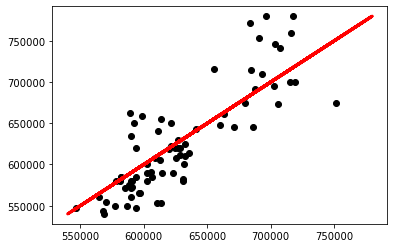

In [344]:
dict_all = get_lr_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'])

In [345]:
dict_all

{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1152755716.7263288,
 'R2': 0.703058701164724,
 'Coefficient(s)': array([ 6.84145536e-01,  3.78058291e+01,  1.80024189e+01,  1.86847697e+01,
        -1.39076055e+03]),
 'Bias': 82361.34972782026}

<BarContainer object of 5 artists>

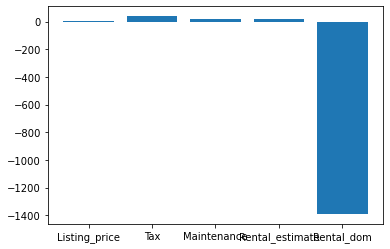

In [346]:
plt.bar(x = 'Features', height= 'Coefficient(s)', data = dict_all)

In [349]:
pd.Series(data=dict_all['Coefficient(s)'], index=dict_all['Features']).sort_values().plot('bar')

### Data Scaling

In [351]:
# Create df with 4 features
# 'Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'

df_aux = df[['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom', 'Sold_price']]

In [352]:
# Split then scale data
df_train, df_test = train_test_split(df_aux, test_size = 0.3, random_state=2020)

In [353]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate scaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler

In [354]:
X_train_scaled = scaler.fit_transform(df_train.drop(columns = 'Sold_price'))
X_test_scaled = scaler.transform(df_test.drop(columns = 'Sold_price')) # fit should only apply in the training set
y_train = df_train['Sold_price']
y_test = df_test['Sold_price']

In [355]:
# train a Ridge Regression model on unscaled data
# Get the MSE
# Scale the features using MinMiza Scaler

from sklearn.linear_model import Ridge

X = df_aux.drop(columns = 'Sold_price')
y = df_aux['Sold_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2020)

In [356]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [357]:
y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)


print("MSE training = ", mean_squared_error(y_train, y_pred_train))
print("MSE test = ", mean_squared_error(y_test, y_pred_test))

MSE training =  1367490427.7421541
MSE test =  1152754329.589753


In [359]:
ridge.coef_

array([ 6.84143869e-01,  3.78054999e+01,  1.80022258e+01,  1.86857144e+01,
       -1.39052402e+03])

In [360]:
ridge.intercept_

82356.91562469525

In [361]:
ridge.alpha

0.5

In [363]:
# Train a new Ridge Regression model on the scaled data
# Get the MSE
ridge.fit(X_train_scaled, y_train)

y_pred_train_scaled = lr.predict(X_train_scaled)
y_pred_test_scaled = lr.predict(X_test_scaled)

print("MSE training = ", mean_squared_error(y_train, y_pred_train_scaled))
print("MSE test = ", mean_squared_error(y_test, y_pred_test_scaled))

MSE training =  1367490426.8182755
MSE test =  1152755716.726343


Unfortunately, scaling didn't improve(decrease) MSE (e.i. 1317878624.7231271 vs 1325537147.0593164)

In [364]:
# Train with unscaled data

def get_ridge_mse_r2(df, list_features):
    X = df[list_features]
    y = df['Sold_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)
    
    #instantiate and fit
    from sklearn.linear_model import Ridge
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    
    # coefficients & bias
    coeff = ridge.coef_
    y_int = ridge.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = ridge.predict(X_test)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black')
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3) # reference line

    # Create an empty dict
    dict_ridge = dict()
    # Populate dicitonary
    dict_ridge['Features'] = list_features
    dict_ridge['MSE'] = mse
    dict_ridge['R2'] = r2
    dict_ridge['Coefficient(s)'] = coeff
    dict_ridge['Bias'] = y_int
    
    return dict_ridge

Coefficient(s):  [ 6.84142202e-01  3.78051708e+01  1.80020327e+01  1.86866588e+01
 -1.39028757e+03]
Bias:  82352.48302966543
MSE:  1152752944.9518123
R2:  0.7030594151532239


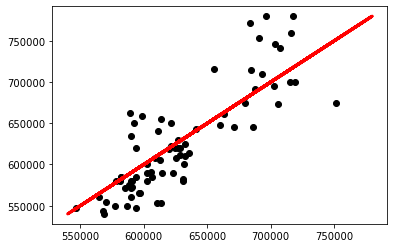

In [366]:
dict_ridge = get_ridge_mse_r2(df,['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'])

### Lasso

In [59]:
from sklearn.linear_model import Lasso
# Instantiate
lasso = Lasso()

In [367]:
# Train with unscaled data

def get_lasso_mse_r2(df, list_features):
    X = df[list_features]
    y = df['Sold_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)
    
    #instantiate and fit
    from sklearn.linear_model import Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    
    # coefficients & bias
    coeff = lasso.coef_
    y_int = lasso.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = lasso.predict(X_test)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_lasso = dict()
    # Populate dicitonary
    dict_lasso['Features'] = list_features
    dict_lasso['MSE'] = mse
    dict_lasso['R2'] = r2
    dict_lasso['Coefficient(s)'] = coeff
    dict_lasso['Bias'] = y_int
    
    return dict_lasso

Coefficient(s):  [ 6.84145166e-01  3.78057383e+01  1.80023221e+01  1.86850093e+01
 -1.39070010e+03]
Bias:  82360.22555235529
MSE:  1152755310.4008696
R2:  0.7030588058311402


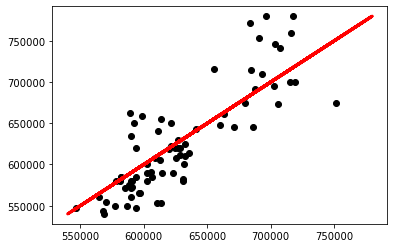

In [369]:
dict_lasso = get_lasso_mse_r2(df,['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'])

In [371]:
print(dict_lasso)
print(dict_ridge)
print(dict_lr)

{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 'MSE': 1152755310.4008696, 'R2': 0.7030588058311402, 'Coefficient(s)': array([ 6.84145166e-01,  3.78057383e+01,  1.80023221e+01,  1.86850093e+01,
       -1.39070010e+03]), 'Bias': 82360.22555235529}
{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 'MSE': 1152752944.9518123, 'R2': 0.7030594151532239, 'Coefficient(s)': array([ 6.84142202e-01,  3.78051708e+01,  1.80020327e+01,  1.86866588e+01,
       -1.39028757e+03]), 'Bias': 82352.48302966543}
{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 'MSE': 1152755716.7263288, 'R2': 0.703058701164724, 'Coefficient(s)': array([ 6.84145536e-01,  3.78058291e+01,  1.80024189e+01,  1.86847697e+01,
       -1.39076055e+03]), 'Bias': 82361.34972782026}


In [376]:
# Train with scaled data

def get_ridge_mse_r2_scaled(df):
    # Split data first*
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state=2020)
    
    # Scale data next*
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    X_test_scaled = scaler.transform(df_test.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    y_train = df_train['Sold_price']
    y_test = df_test['Sold_price']
    
    
    #instantiate and fit
    ridge = Ridge()
    ridge.fit(X_train_scaled, y_train)
    
    # coefficients & bias
    coeff = ridge.coef_
    y_int = ridge.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = ridge.predict(X_test_scaled)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_ridge = dict()
    # Populate dicitonary
    dict_ridge['Features'] = df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']).columns
    dict_ridge['MSE'] = mse
    dict_ridge['R2'] = r2
    dict_ridge['Coefficient(s)'] = coeff
    dict_ridge['Bias'] = y_int
    
    return dict_ridge

In [377]:
dict_ridge

{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1152752944.9518123,
 'R2': 0.7030594151532239,
 'Coefficient(s)': array([ 6.84142202e-01,  3.78051708e+01,  1.80020327e+01,  1.86866588e+01,
        -1.39028757e+03]),
 'Bias': 82352.48302966543}

Coefficient(s):  [157316.8099896   98462.88673368  18497.10256453 -27207.44098813
  48323.44962841]
Bias:  477199.28794483293
MSE:  1249927405.1603482
R2:  0.6780279969531181


{'MSE': 1249927405.1603482,
 'R2': 0.6780279969531181,
 'Coefficient(s)': array([157316.8099896 ,  98462.88673368,  18497.10256453, -27207.44098813,
         48323.44962841]),
 'Bias': 477199.28794483293}

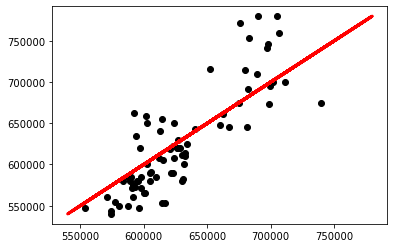

In [378]:
dict_ridge_scaled = get_ridge_mse_r2_scaled(df)
dict_ridge_scaled

In [379]:
# Train with scaled data

def get_lasso_mse_r2_scaled(df):
    # Split data first*
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state=2020)
    
    # Scale data next*
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    X_test_scaled = scaler.transform(df_test.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    y_train = df_train['Sold_price']
    y_test = df_test['Sold_price']
    
    
    #instantiate and fit
    lasso = Lasso()
    lasso.fit(X_train_scaled, y_train)
    
    # coefficients & bias
    coeff = lasso.coef_
    y_int = lasso.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = lasso.predict(X_test_scaled)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_lasso = dict()
    # Populate dicitonary
    dict_lasso['Features'] = df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']).columns
    dict_lasso['MSE'] = mse
    dict_lasso['R2'] = r2
    dict_lasso['Coefficient(s)'] = coeff
    dict_lasso['Bias'] = y_int
    
    return dict_lasso

In [381]:
dict_lasso

{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1152755310.4008696,
 'R2': 0.7030588058311402,
 'Coefficient(s)': array([ 6.84145166e-01,  3.78057383e+01,  1.80023221e+01,  1.86850093e+01,
        -1.39070010e+03]),
 'Bias': 82360.22555235529}

Coefficient(s):  [170433.25110687 133300.94066678  15999.87830913 -36124.04563656
  45278.36636476]
Bias:  451286.6448181631
MSE:  1152845061.799474
R2:  0.7030356865383991


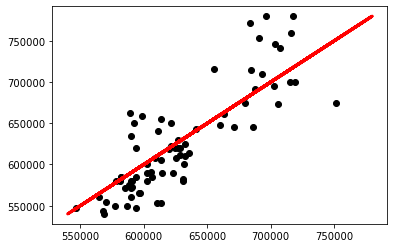

In [382]:
dict_lasso_scaled = get_lasso_mse_r2_scaled(df)

In [88]:
dict_lr

{'Features': ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'],
 'MSE': 1313967402.572227,
 'R2': 0.647731684484905,
 'Coefficient(s)': array([  0.67038521,  39.4485254 , -13.12266801,  39.40129511]),
 'Bias': 30899.797526078182}

In [386]:
# Train with scaled data

def get_lr_mse_r2_scaled(df):
    # Split data first*
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state=2020)
    
    # Scale data next*
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    X_test_scaled = scaler.transform(df_test.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']))
    y_train = df_train['Sold_price']
    y_test = df_test['Sold_price']
    
    #instantiate and fit
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    # coefficients & bias
    coeff = lr.coef_
    y_int = lr.intercept_
    print("Coefficient(s): ", coeff)
    print("Bias: ", y_int)
    
    # making predictions
    y_pred = lr.predict(X_test_scaled)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_lr = dict()
    # Populate dicitonary
    dict_lr['Features'] = df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_yield']).columns
    dict_lr['MSE'] = mse
    dict_lr['R2'] = r2
    dict_lr['Coefficient(s)'] = coeff
    dict_lr['Bias'] = y_int
    
    return dict_lr

In [387]:
dict_lr

{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1152755716.7263288,
 'R2': 0.703058701164724,
 'Coefficient(s)': array([ 6.84145536e-01,  3.78058291e+01,  1.80024189e+01,  1.86847697e+01,
        -1.39076055e+03]),
 'Bias': 82361.34972782026}

Coefficient(s):  [170428.86286107 133378.96494359  16022.15282366 -36159.77436135
  45291.88175674]
Bias:  451240.3834512733
MSE:  1152755716.7263432
R2:  0.7030587011647202


{'Features': Index(['Listing_price', 'Tax', 'Maintenance', 'Rental_dom', 'Rental_estimate'], dtype='object'),
 'MSE': 1152755716.7263432,
 'R2': 0.7030587011647202,
 'Coefficient(s)': array([170428.86286107, 133378.96494359,  16022.15282366, -36159.77436135,
         45291.88175674]),
 'Bias': 451240.3834512733}

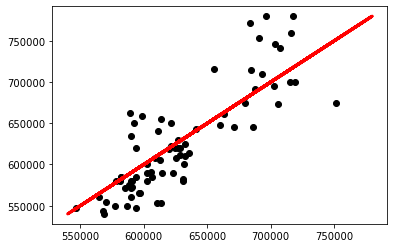

In [388]:
dict_lr_scaled = get_lr_mse_r2_scaled(df)
dict_lr_scaled

In [121]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [115]:
df

,Listing_price,Sigma_estimate,Sold_price,Tax,Maintenance,Rental_dom,Rental_estimate,Rental_yield
2,555000.0,585599.0,545000.0,2155.0,536.0,17.0,2209.0,2.85
4,599000.0,658573.0,555000.0,2213.0,464.0,14.0,2242.0,2.74
6,699000.0,773279.0,780000.0,3088.0,395.0,11.0,2606.0,2.91
7,599900.0,611736.0,590300.0,2621.0,347.0,22.0,2050.0,2.67
8,598000.0,653108.0,615000.0,2147.0,550.0,14.0,2450.0,2.99
...,...,...,...,...,...,...,...,...
267,699999.0,705789.0,652500.0,2378.0,541.0,20.0,2099.0,2.11
269,599000.0,686384.0,775000.0,2657.0,460.0,13.0,2306.0,2.69
270,619900.0,624682.0,608000.0,2117.0,366.0,17.0,2124.0,2.85
271,599900.0,614461.0,670000.0,2413.0,438.0,20.0,2200.0,2.81


In [392]:
# Train with unscaled data

def get_rf_mse_r2(df, list_features, n_estimators, random_state):
    X = df[list_features]
    y = df['Sold_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)
    
    #instantiate and fit
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X_train, y_train)
    
#     # coefficients & bias
#     coeff = rf.coef_
#     y_int = rf.intercept_
#     print("Coefficient(s): ", coeff)
#     print("Bias: ", y_int)
    
    # making predictions
    y_pred = rf.predict(X_test)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_rf = dict()
    # Populate dicitonary
    dict_rf['Features'] = list_features
    dict_rf['MSE'] = mse
    dict_rf['R2'] = r2
#     dict_rf['Coefficient(s)'] = coeff
#     dict_rf['Bias'] = y_int
    
    return dict_rf

MSE:  1329153935.7142856
R2:  0.6576198319416198


{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1329153935.7142856,
 'R2': 0.6576198319416198}

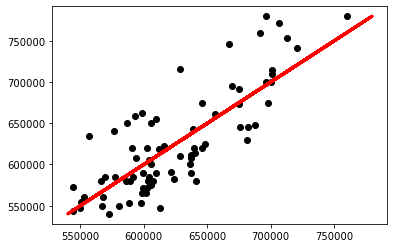

In [393]:
get_rf_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 10, 0) #n_estimators=10, random_state=0

MSE:  1224172083.9194806
R2:  0.6846623761457035


{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1224172083.9194806,
 'R2': 0.6846623761457035}

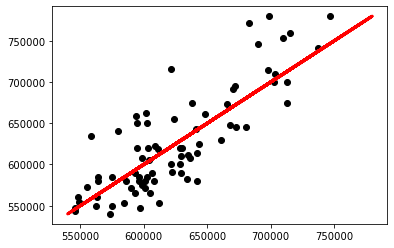

In [394]:
get_rf_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 20, 0) #n_estimators=20, random_state=0

MSE:  1121685709.2909923
R2:  0.7110621039922294


{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1121685709.2909923,
 'R2': 0.7110621039922294}

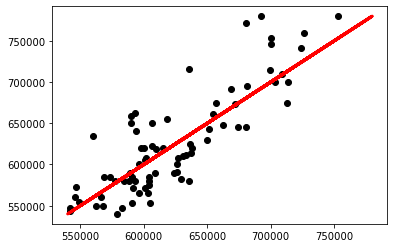

In [395]:
get_rf_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 100, 0) #n_estimators=100, random_state=0

MSE:  1116918392.920153
R2:  0.7122901292317275


{'Features': ['Listing_price',
  'Tax',
  'Maintenance',
  'Rental_estimate',
  'Rental_dom'],
 'MSE': 1116918392.920153,
 'R2': 0.7122901292317275}

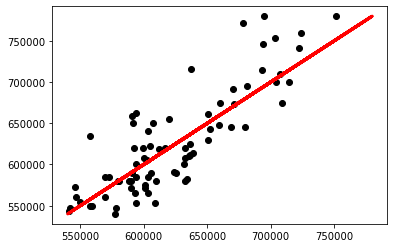

In [396]:
get_rf_mse_r2(df, ['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate', 'Rental_dom'], 1000, 0) #n_estimators=100, random_state=0

In [174]:
# Train with unscaled data

def get_rf_mse_r2_scaled(df):
    scaler = MinMaxScaler()
    #Split data
    df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 2020)
    X_train_scaled = scaler.fit_transform(df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_dom', 'Rental_yield']))
    X_test_scaled = scaler.transform(df_test.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_dom', 'Rental_yield']))
    y_train = df_train['Sold_price']
    y_test = df_test['Sold_price']

    #instantiate and fit
    rf = RandomForestRegressor(n_estimators=20, random_state=0)
    rf.fit(X_train_scaled, y_train)
    
#     # coefficients & bias
#     coeff = rf.coef_
#     y_int = rf.intercept_
#     print("Coefficient(s): ", coeff)
#     print("Bias: ", y_int)
    
    # making predictions
    y_pred = rf.predict(X_test_scaled)
    
    # metrics of performance
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("R2: ", r2)
    
    # plot
    plt.scatter(y_pred, y_test.values, color='black',)
    plt.plot(y_test.values, y_test.values, color='red', linewidth=3)

    # Create an empty dict
    dict_rf = dict()
    # Populate dicitonary
    dict_rf['Features'] = df_train.drop(columns = ['Sold_price', 'Sigma_estimate', 'Rental_dom','Rental_yield']).columns
    dict_rf['MSE'] = mse
    dict_rf['R2'] = r2
#     dict_rf['Coefficient(s)'] = coeff
#     dict_rf['Bias'] = y_int
    
    return dict_rf

MSE:  1803620444.77731
R2:  0.5164580683915676


{'Features': Index(['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'], dtype='object'),
 'MSE': 1803620444.77731,
 'R2': 0.5164580683915676}

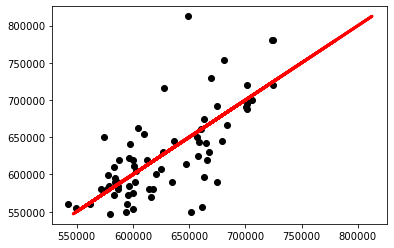

In [152]:
get_rf_mse_r2_scaled(df)

MSE:  1544448832.011413
R2:  0.5859407262411062


{'Features': Index(['Listing_price', 'Tax', 'Maintenance', 'Rental_estimate'], dtype='object'),
 'MSE': 1544448832.011413,
 'R2': 0.5859407262411062}

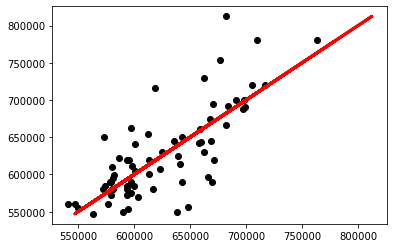

In [175]:
get_rf_mse_r2_scaled(df)

### Cross validation

In [176]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

scores = cross_val_score(lr, X_train, y_train, cv=10)

In [154]:
scores

array([0.7755979 , 0.59064193, 0.58056307, 0.67173915, 0.56525545,
       0.55546467, 0.65584869, 0.69326957, 0.60944966, 0.62633835])

In [155]:
scores = cross_val_score(lasso, X_train, y_train, cv=10)
scores

array([0.7755979 , 0.59064195, 0.58056307, 0.67173913, 0.56525548,
       0.55546466, 0.65584884, 0.69326961, 0.60944968, 0.62633837])

In [156]:
scores = cross_val_score(ridge, X_train, y_train, cv=10)
scores

array([0.7755979 , 0.59064193, 0.58056307, 0.67173915, 0.56525545,
       0.55546467, 0.65584869, 0.69326957, 0.60944966, 0.62633835])

AttributeError: 'PlotAccessor' object has no attribute 'show'

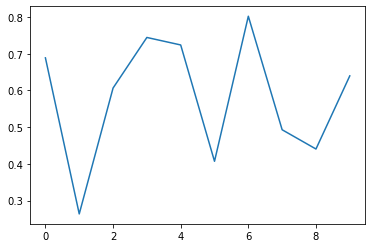

In [217]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
scores = pd.Series(scores)
scores.plot()
plt.show() 

In [195]:
scores.T

array([0.68387192, 0.29070537, 0.63448666, 0.75015575, 0.71073162,
       0.43550823, 0.81578519, 0.48939421, 0.49956586, 0.62442266])

In [184]:
scores

array([0.68955956, 0.25967884, 0.62844496, 0.7430241 , 0.73282292,
       0.42734499, 0.80152618, 0.51169283, 0.47339817, 0.67255679])